In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv(r'Credit Card Fraud Detection.csv')
data.head()

,age,income,loan_amount,credit_score,employment_status,default(y),loan_term,interest_rate,debt_to_income_ratio,num_of_dependents,education_level,home_ownership,marital_status,credit_history_length,num_credit_lines,late_payments,bankruptcies,annual_savings,retirement_savings,monthly_expenses
0,38,71440,27069,689,self-employed,1,36,9.937874,31.046101,0,high_school,rent,married,7,6,1,1,25259,195208,6037
1,36,90200,14895,578,employed,0,48,13.624882,21.845252,0,high_school,own,married,11,16,8,0,40761,152999,4064
2,47,85896,2613,352,employed,1,12,6.676366,12.562405,1,bachelor,mortgage,divorced,24,2,2,0,34857,67487,2848
3,38,20121,3163,622,unemployed,0,48,12.833366,17.144545,1,master,own,married,12,4,6,1,16048,98869,7721
4,44,77529,37731,615,self-employed,0,12,4.111636,35.892430,3,high_school,own,single,27,7,5,0,5668,42397,8009


In [5]:
data.isnull().sum()

age                      0
income                   0
loan_amount              0
credit_score             0
employment_status        0
default(y)               0
loan_term                0
interest_rate            0
debt_to_income_ratio     0
num_of_dependents        0
education_level          0
home_ownership           0
marital_status           0
credit_history_length    0
num_credit_lines         0
late_payments            0
bankruptcies             0
annual_savings           0
retirement_savings       0
monthly_expenses         0
dtype: int64

In [6]:
data.duplicated().sum()

0

In [7]:
data.columns

Index(['age', 'income', 'loan_amount', 'credit_score', 'employment_status',
       'default(y)', 'loan_term', 'interest_rate', 'debt_to_income_ratio',
       'num_of_dependents', 'education_level', 'home_ownership',
       'marital_status', 'credit_history_length', 'num_credit_lines',
       'late_payments', 'bankruptcies', 'annual_savings', 'retirement_savings',
       'monthly_expenses'],
      dtype='object')

In [8]:
continuous = ['age', 'income', 'loan_amount', 'credit_score','loan_term', 'interest_rate', 'debt_to_income_ratio','annual_savings', 'retirement_savings','monthly_expenses']
discrete = ['num_of_dependents','credit_history_length','num_credit_lines','late_payments', 'bankruptcies']
ordinal = ['education_level','home_ownership','employment_status']
nominal = ['marital_status',]

In [9]:
x = data.iloc[:,data.columns !='default(y)']
y = data[['default(y)']]

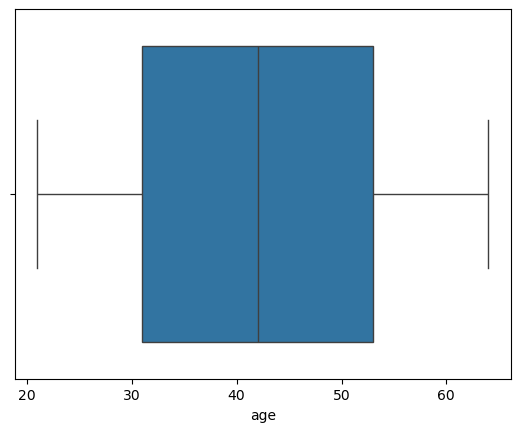

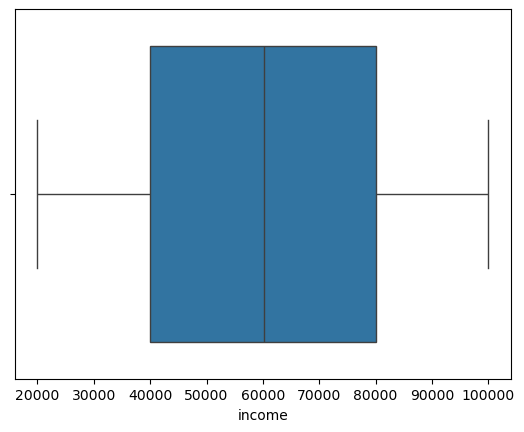

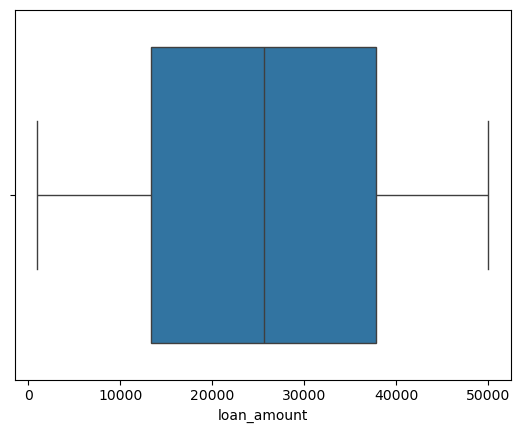

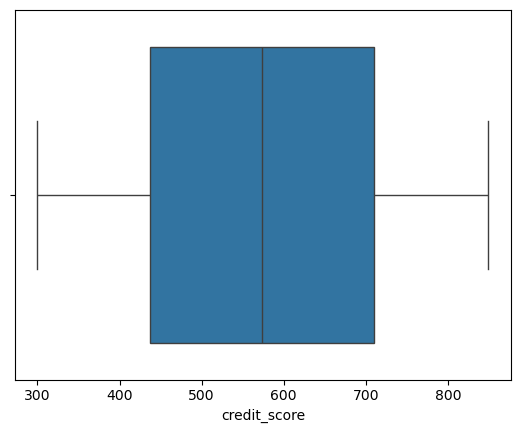

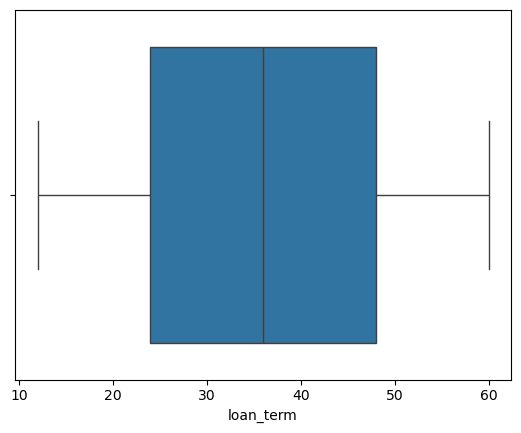

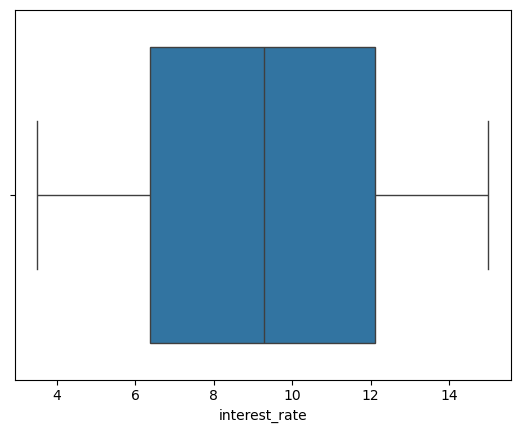

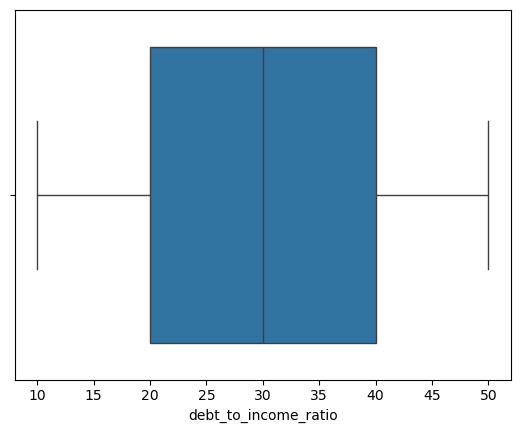

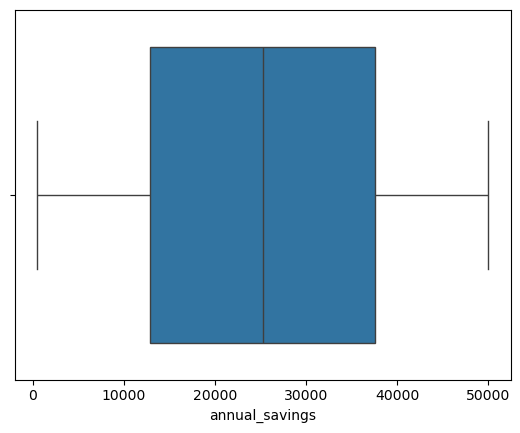

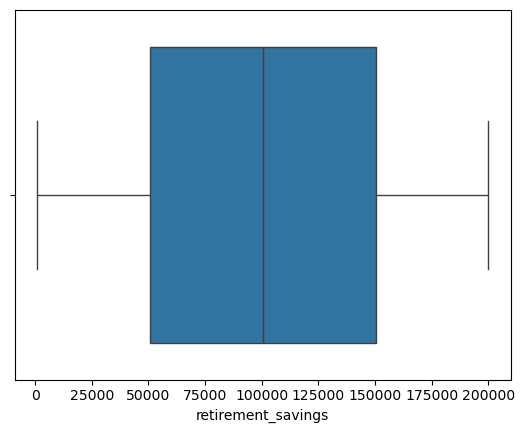

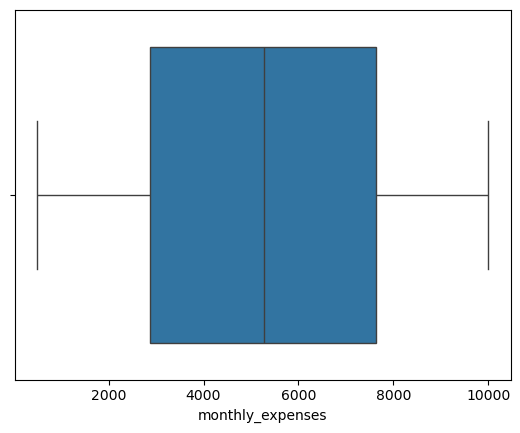

In [10]:
for i in continuous:
  sns.boxplot(x = i,data = data)
  plt.show()

In [11]:
def out_tret(i):
  q1 = data[i].quantile(0.25)
  q3 = data[i].quantile(0.75)
  iqr = q3-q1
  ll = q1 - 1.5*iqr
  ul = q3 + 1.5*iqr
  data[i] = data[i].clip(lower = ll,upper = ul)
  return data[i]

In [12]:
for i in continuous:
  data[i] = out_tret(i)

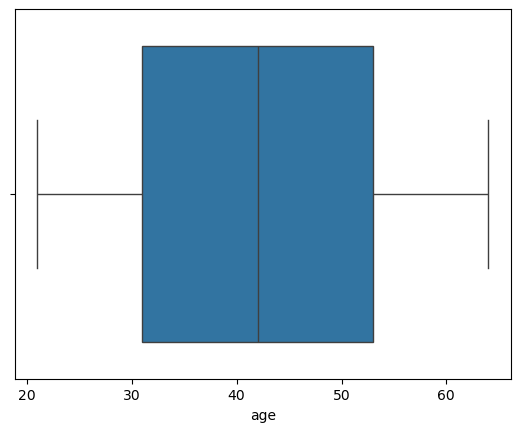

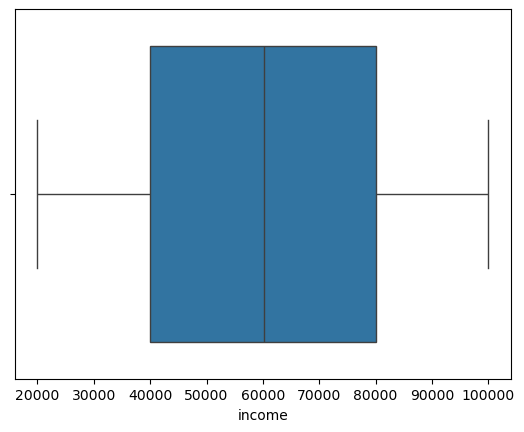

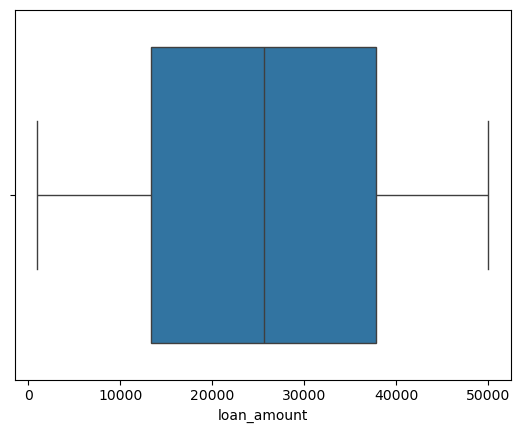

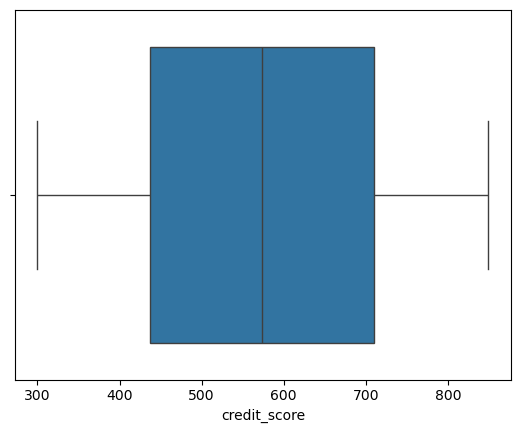

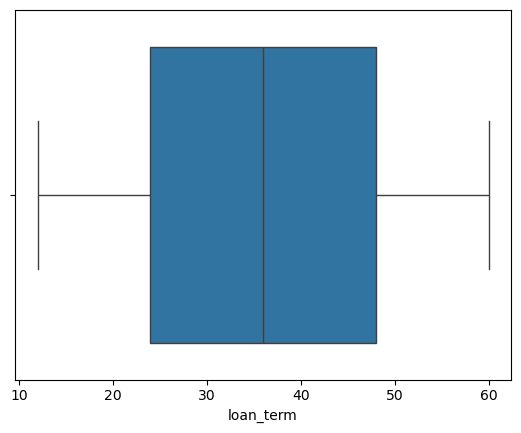

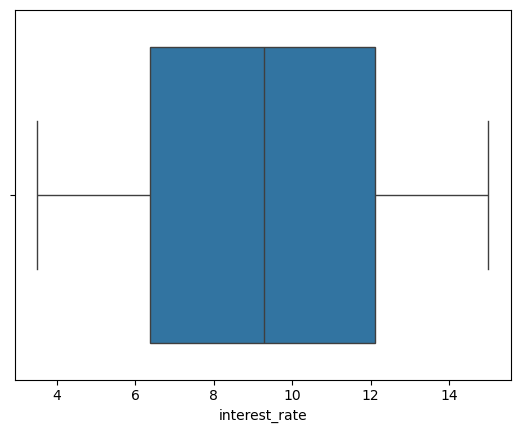

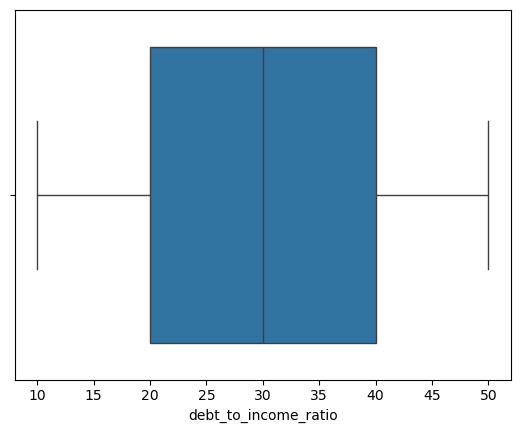

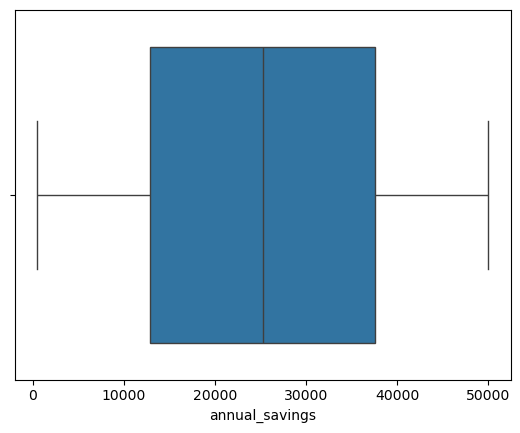

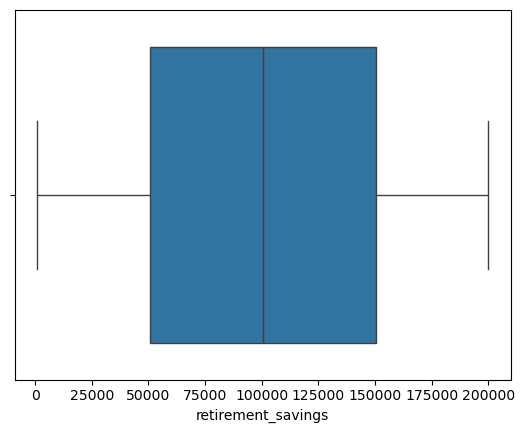

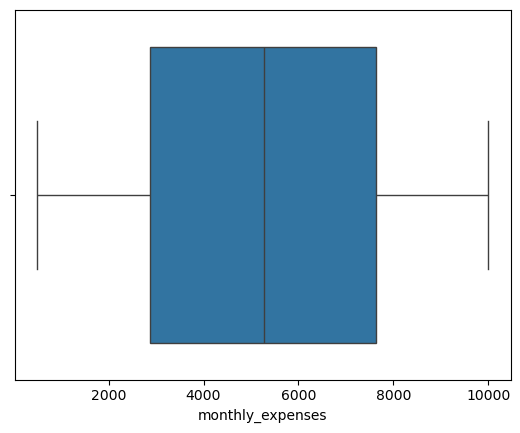

In [13]:
for i in continuous:
  sns.boxplot(x = i,data = data)
  plt.show()

In [14]:
for i in ordinal:
  print(data[i].nunique())
  print(data[i].value_counts())

4
education_level
high_school    39963
bachelor       35206
master         19857
phd             4974
Name: count, dtype: int64
3
home_ownership
rent        49973
own         29898
mortgage    20129
Name: count, dtype: int64
3
employment_status
employed         70310
unemployed       19844
self-employed     9846
Name: count, dtype: int64


In [15]:
order1 = ['high_school','bachelor','master','phd']
order2 = ['rent','mortgage','own']
order3 = ['unemployed','employed','self-employed']

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder

In [17]:
# Define preprocessing pipelines
continuous_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

discrete_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

nominal_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

ordinal_pipeline1 = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OrdinalEncoder(categories=[order1]))
])

ordinal_pipeline2 = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OrdinalEncoder(categories=[order2]))
])

ordinal_pipeline3 = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OrdinalEncoder(categories=[order3]))
])

In [18]:
from sklearn.compose import ColumnTransformer

In [19]:
# ColumnTransformer for feature engineering
preprocessor = ColumnTransformer([
    ("continuous", continuous_pipeline, continuous),
    ("discrete", discrete_pipeline, discrete),
    ("nominal", nominal_pipeline, nominal),
    ("ordinal1", ordinal_pipeline1, ['education_level']),
    ("ordinal2", ordinal_pipeline2, ['home_ownership']),
    ("ordinal3", ordinal_pipeline3, ['employment_status'])
])

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

In [21]:
# **Define Multiple Models**
models = {
    "LogisticRegression": LogisticRegression(class_weight="balanced", random_state=42),
    "DecisionTree": DecisionTreeClassifier(class_weight="balanced", random_state=42),
    "RandomForest": RandomForestClassifier(class_weight="balanced", random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=50, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
    "KNN": KNeighborsClassifier(n_neighbors=5)

}

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.combine import SMOTETomek
from sklearn.metrics import classification_report

In [24]:
# Define preprocessing pipelines
continuous_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

discrete_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

nominal_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

ordinal_pipeline1 = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OrdinalEncoder(categories=[order1]))
])

ordinal_pipeline2 = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OrdinalEncoder(categories=[order2]))
])

ordinal_pipeline3 = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OrdinalEncoder(categories=[order3]))
])

In [25]:
from sklearn.compose import ColumnTransformer

In [26]:
# ColumnTransformer for feature engineering
preprocessor = ColumnTransformer([
    ("continuous", continuous_pipeline, continuous),
    ("discrete", discrete_pipeline, discrete),
    ("nominal", nominal_pipeline, nominal),
    ("ordinal1", ordinal_pipeline1, ['education_level']),
    ("ordinal2", ordinal_pipeline2, ['home_ownership']),
    ("ordinal3", ordinal_pipeline3, ['employment_status'])
])

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

In [28]:
# **Define Multiple Models**
models = {
    "LogisticRegression": LogisticRegression(class_weight="balanced", random_state=42),
    "DecisionTree": DecisionTreeClassifier(class_weight="balanced", random_state=42),
    "RandomForest": RandomForestClassifier(class_weight="balanced", random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=50, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
    "KNN": KNeighborsClassifier(n_neighbors=5)

}

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
# **Train-Test Split**
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [31]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.combine import SMOTETomek
from sklearn.metrics import classification_report

In [32]:
# **Loop through models and evaluate**
for name, model in models.items():
    print(f"\n🔹 Training model: {name}")

    # Full pipeline (Preprocessing → SMOTETomek → Model)
    model_pipeline = ImbPipeline([
        ("preprocessor", preprocessor),
        ("resampling", SMOTETomek(random_state=42)),
        ("classifier", model)
    ])

    # **Train model**
    model_pipeline.fit(xtrain, ytrain)

    # **Predictions & Evaluation**
    ypred = model_pipeline.predict(xtest)
    print(classification_report(ytest, ypred))


🔹 Training model: LogisticRegression
              precision    recall  f1-score   support

           0       0.49      0.49      0.49      9981
           1       0.50      0.50      0.50     10019

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000


🔹 Training model: DecisionTree
              precision    recall  f1-score   support

           0       0.50      0.49      0.50      9981
           1       0.50      0.50      0.50     10019

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000


🔹 Training model: RandomForest
              precision    recall  f1-score   support

           0       0.50      0.53      0.52      9981
           1       0.50      0.47      0.48     10019

    accuracy                           0.50     20000
   macro avg       0.50   

In [33]:
mod = XGBClassifier(use_label_encoder=False, eval_metric="logloss")

In [34]:
mod_pipeline = ImbPipeline([
        ("preprocessor", preprocessor),
        ("resampling", SMOTETomek(random_state=42)),  # Handles class imbalance
        ("classifier", mod)
    ])

In [35]:
# **Train model**
mod_pipeline.fit(xtrain, ytrain)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('continuous',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'income',
                                                   'loan_amount',
                                                   'credit_score', 'loan_term',
                                                   'interest_rate',
                                                   'debt_to_income_ratio',
                                                   'annual_savings',
                                                   'retirement_savings',
                                                   'monthly_expenses']),
                                                 ('discrete',
                                                  Pipeline(steps...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [36]:
# **Predictions & Evaluation**
ypred = mod_pipeline.predict(xtest)
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50      9981
           1       0.50      0.50      0.50     10019

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000



In [37]:
import joblib

In [38]:
preprocessor_pipeline = mod_pipeline.named_steps['preprocessor']
joblib.dump(preprocessor_pipeline,'preprocessor.pkl')

['preprocessor.pkl']

In [39]:
model_pipeline = mod_pipeline.named_steps['classifier']
joblib.dump(model_pipeline,'model.pkl')

['model.pkl']

In [40]:
pwd

'C:\\Users\\91909\\0 Real Project\\Bank Fradulent detection'

In [41]:
import xgboost
print("XGBoost Version:", xgboost.__version__)


XGBoost Version: 1.7.3


In [42]:
#pip install xgboost==1.7.3

In [43]:
import sklearn
print("sklearn Version:", sklearn.__version__)


sklearn Version: 1.2.2
